In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
#cd  /content/drive/MyDrive/Mini-Hackathon1/Dataset/

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("sample_submission.csv")

In [5]:

train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [7]:
train.shape,test.shape

((7000, 24), (3000, 23))

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.00000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.00000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.00000,3.0000,5.0000


<AxesSubplot:>

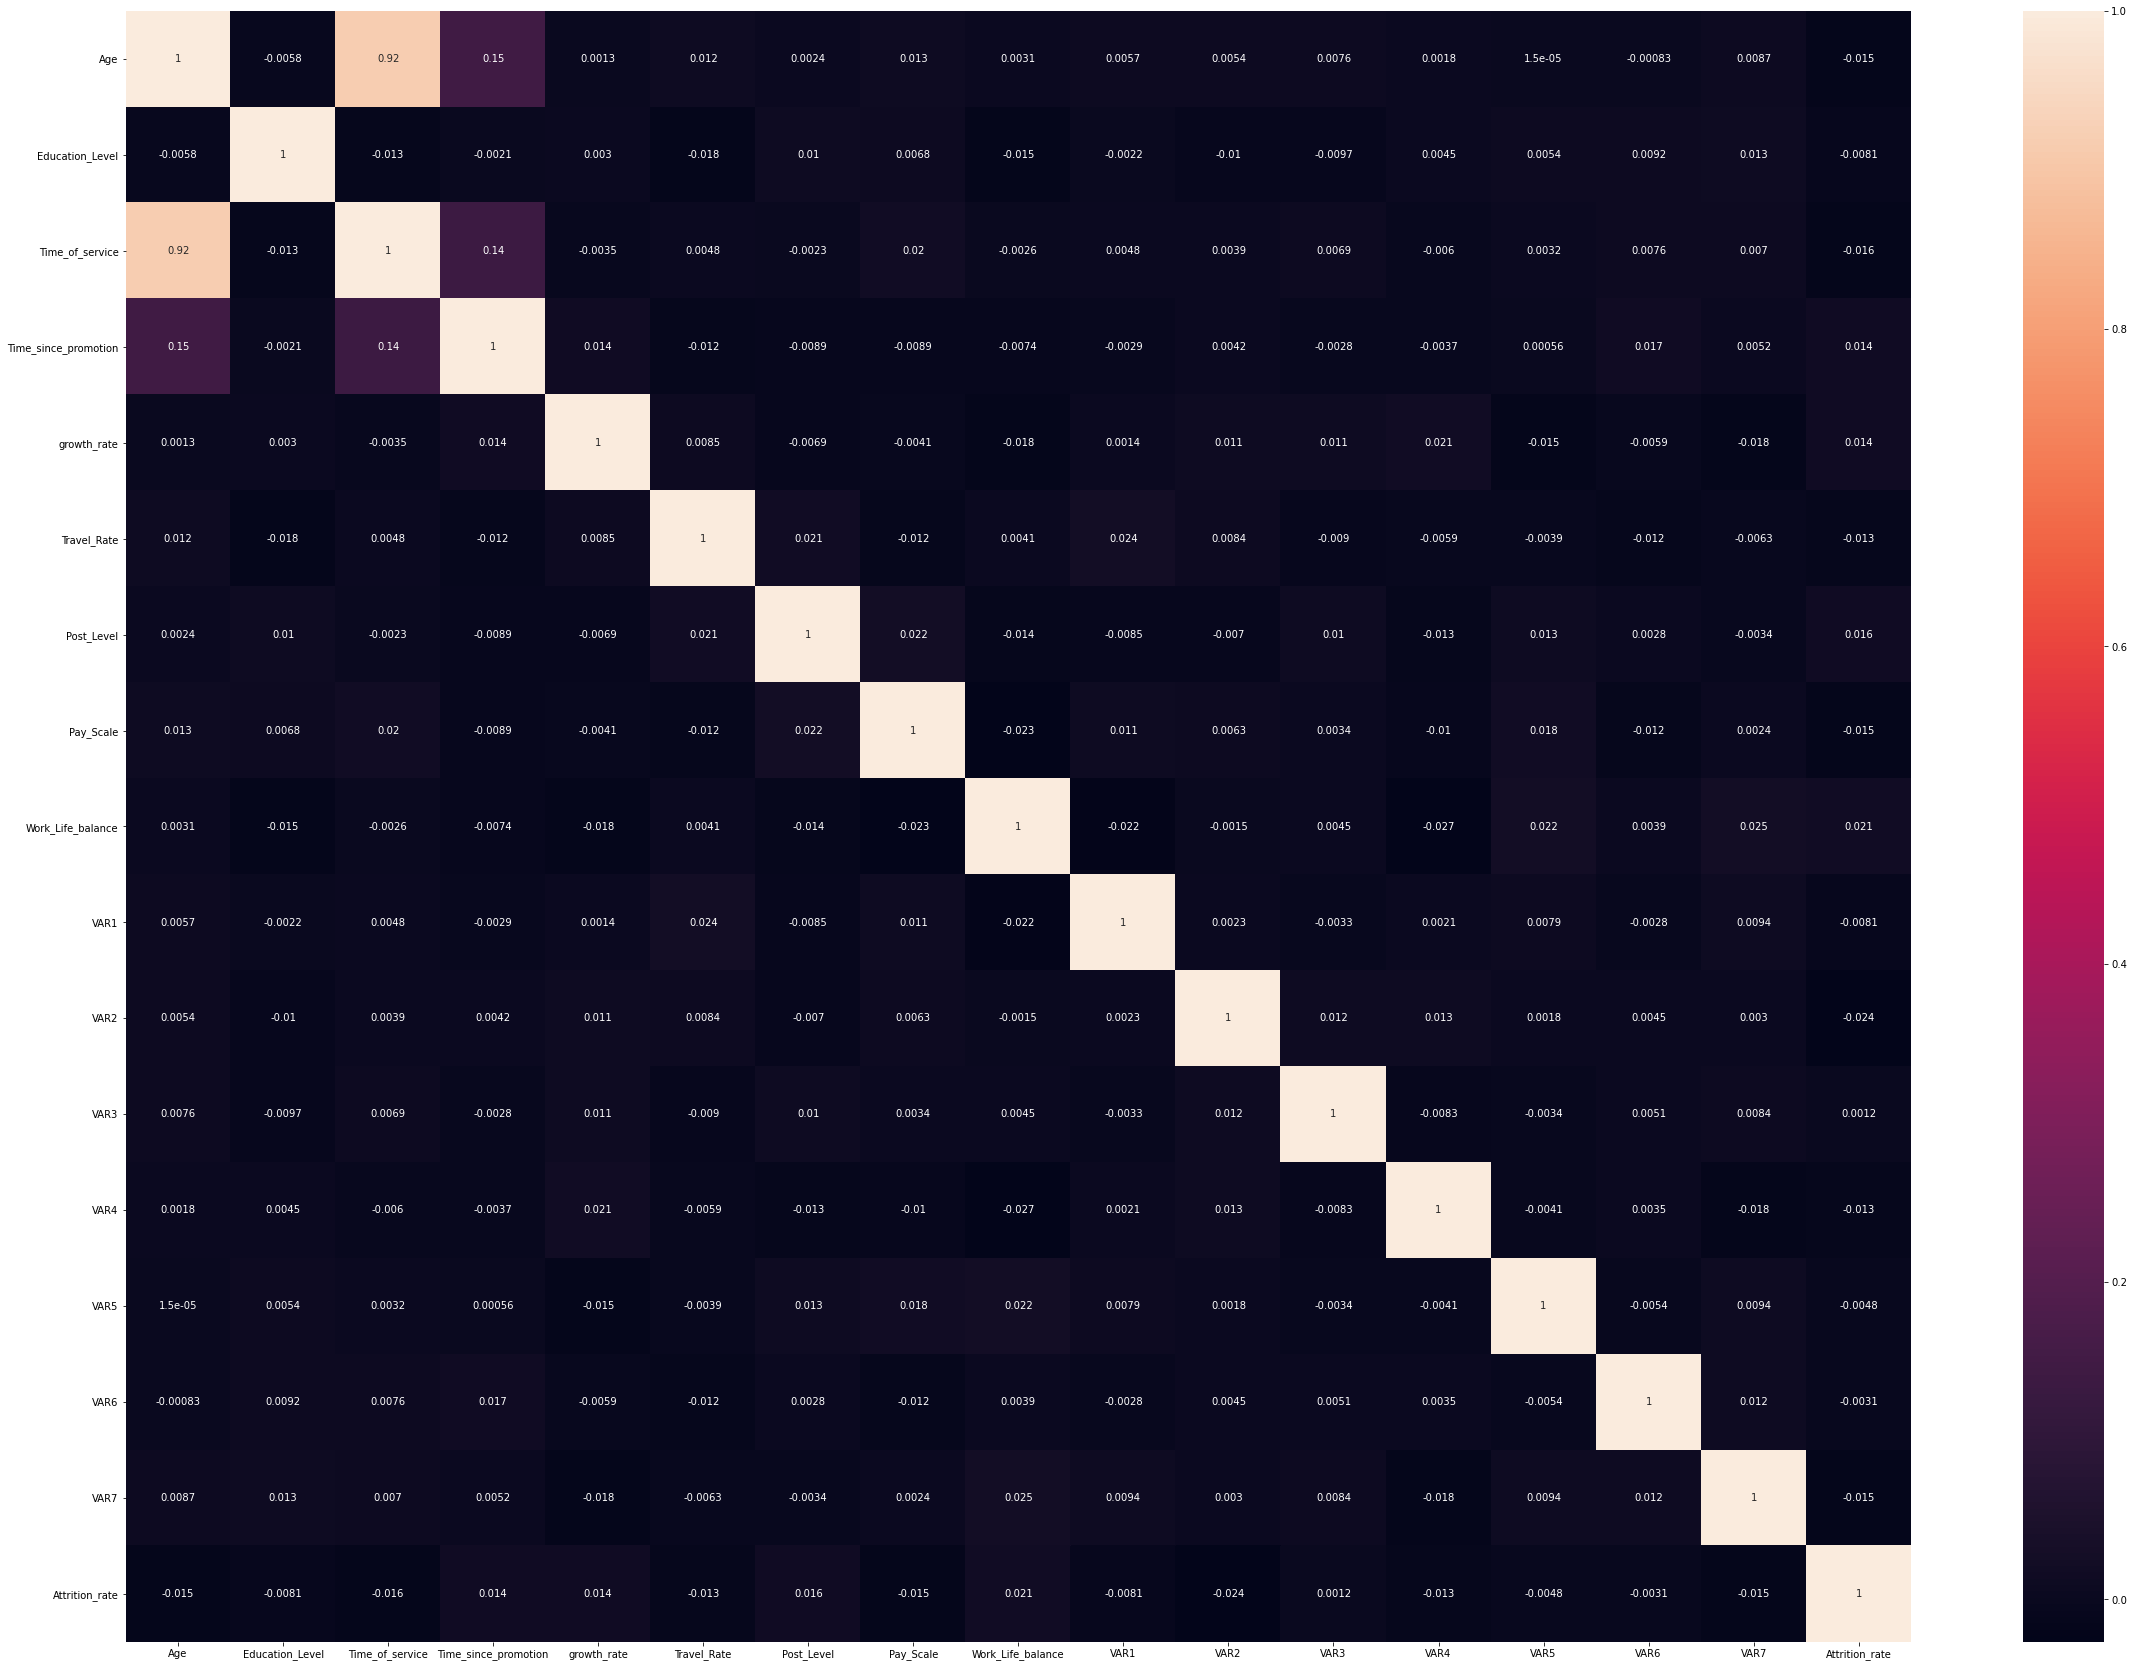

In [9]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True)

In [10]:
train.duplicated().sum()

0

In [11]:
train['data']="train"
test['data']="test"

full_data=pd.concat([train,test])
full_data = full_data.reset_index().drop(columns="index")

In [12]:
full_data.shape

(10000, 25)

In [13]:
full_data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,data
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,train
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,train
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,train
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,train
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN,test
9996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN,test
9997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN,test
9998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN,test


In [14]:
full_data.apply(lambda x: x.nunique())

Employee_ID                  10000
Gender                           2
Age                             47
Education_Level                  5
Relationship_Status              2
Hometown                         5
Unit                            12
Decision_skill_possess           4
Time_of_service                 44
Time_since_promotion             5
growth_rate                     55
Travel_Rate                      3
Post_Level                       5
Pay_Scale                       10
Compensation_and_Benefits        5
Work_Life_balance                5
VAR1                             5
VAR2                             5
VAR3                             5
VAR4                             3
VAR5                             5
VAR6                             5
VAR7                             5
Attrition_rate                3317
data                             2
dtype: int64

EXPLORATORY DATA ANALYSIS

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

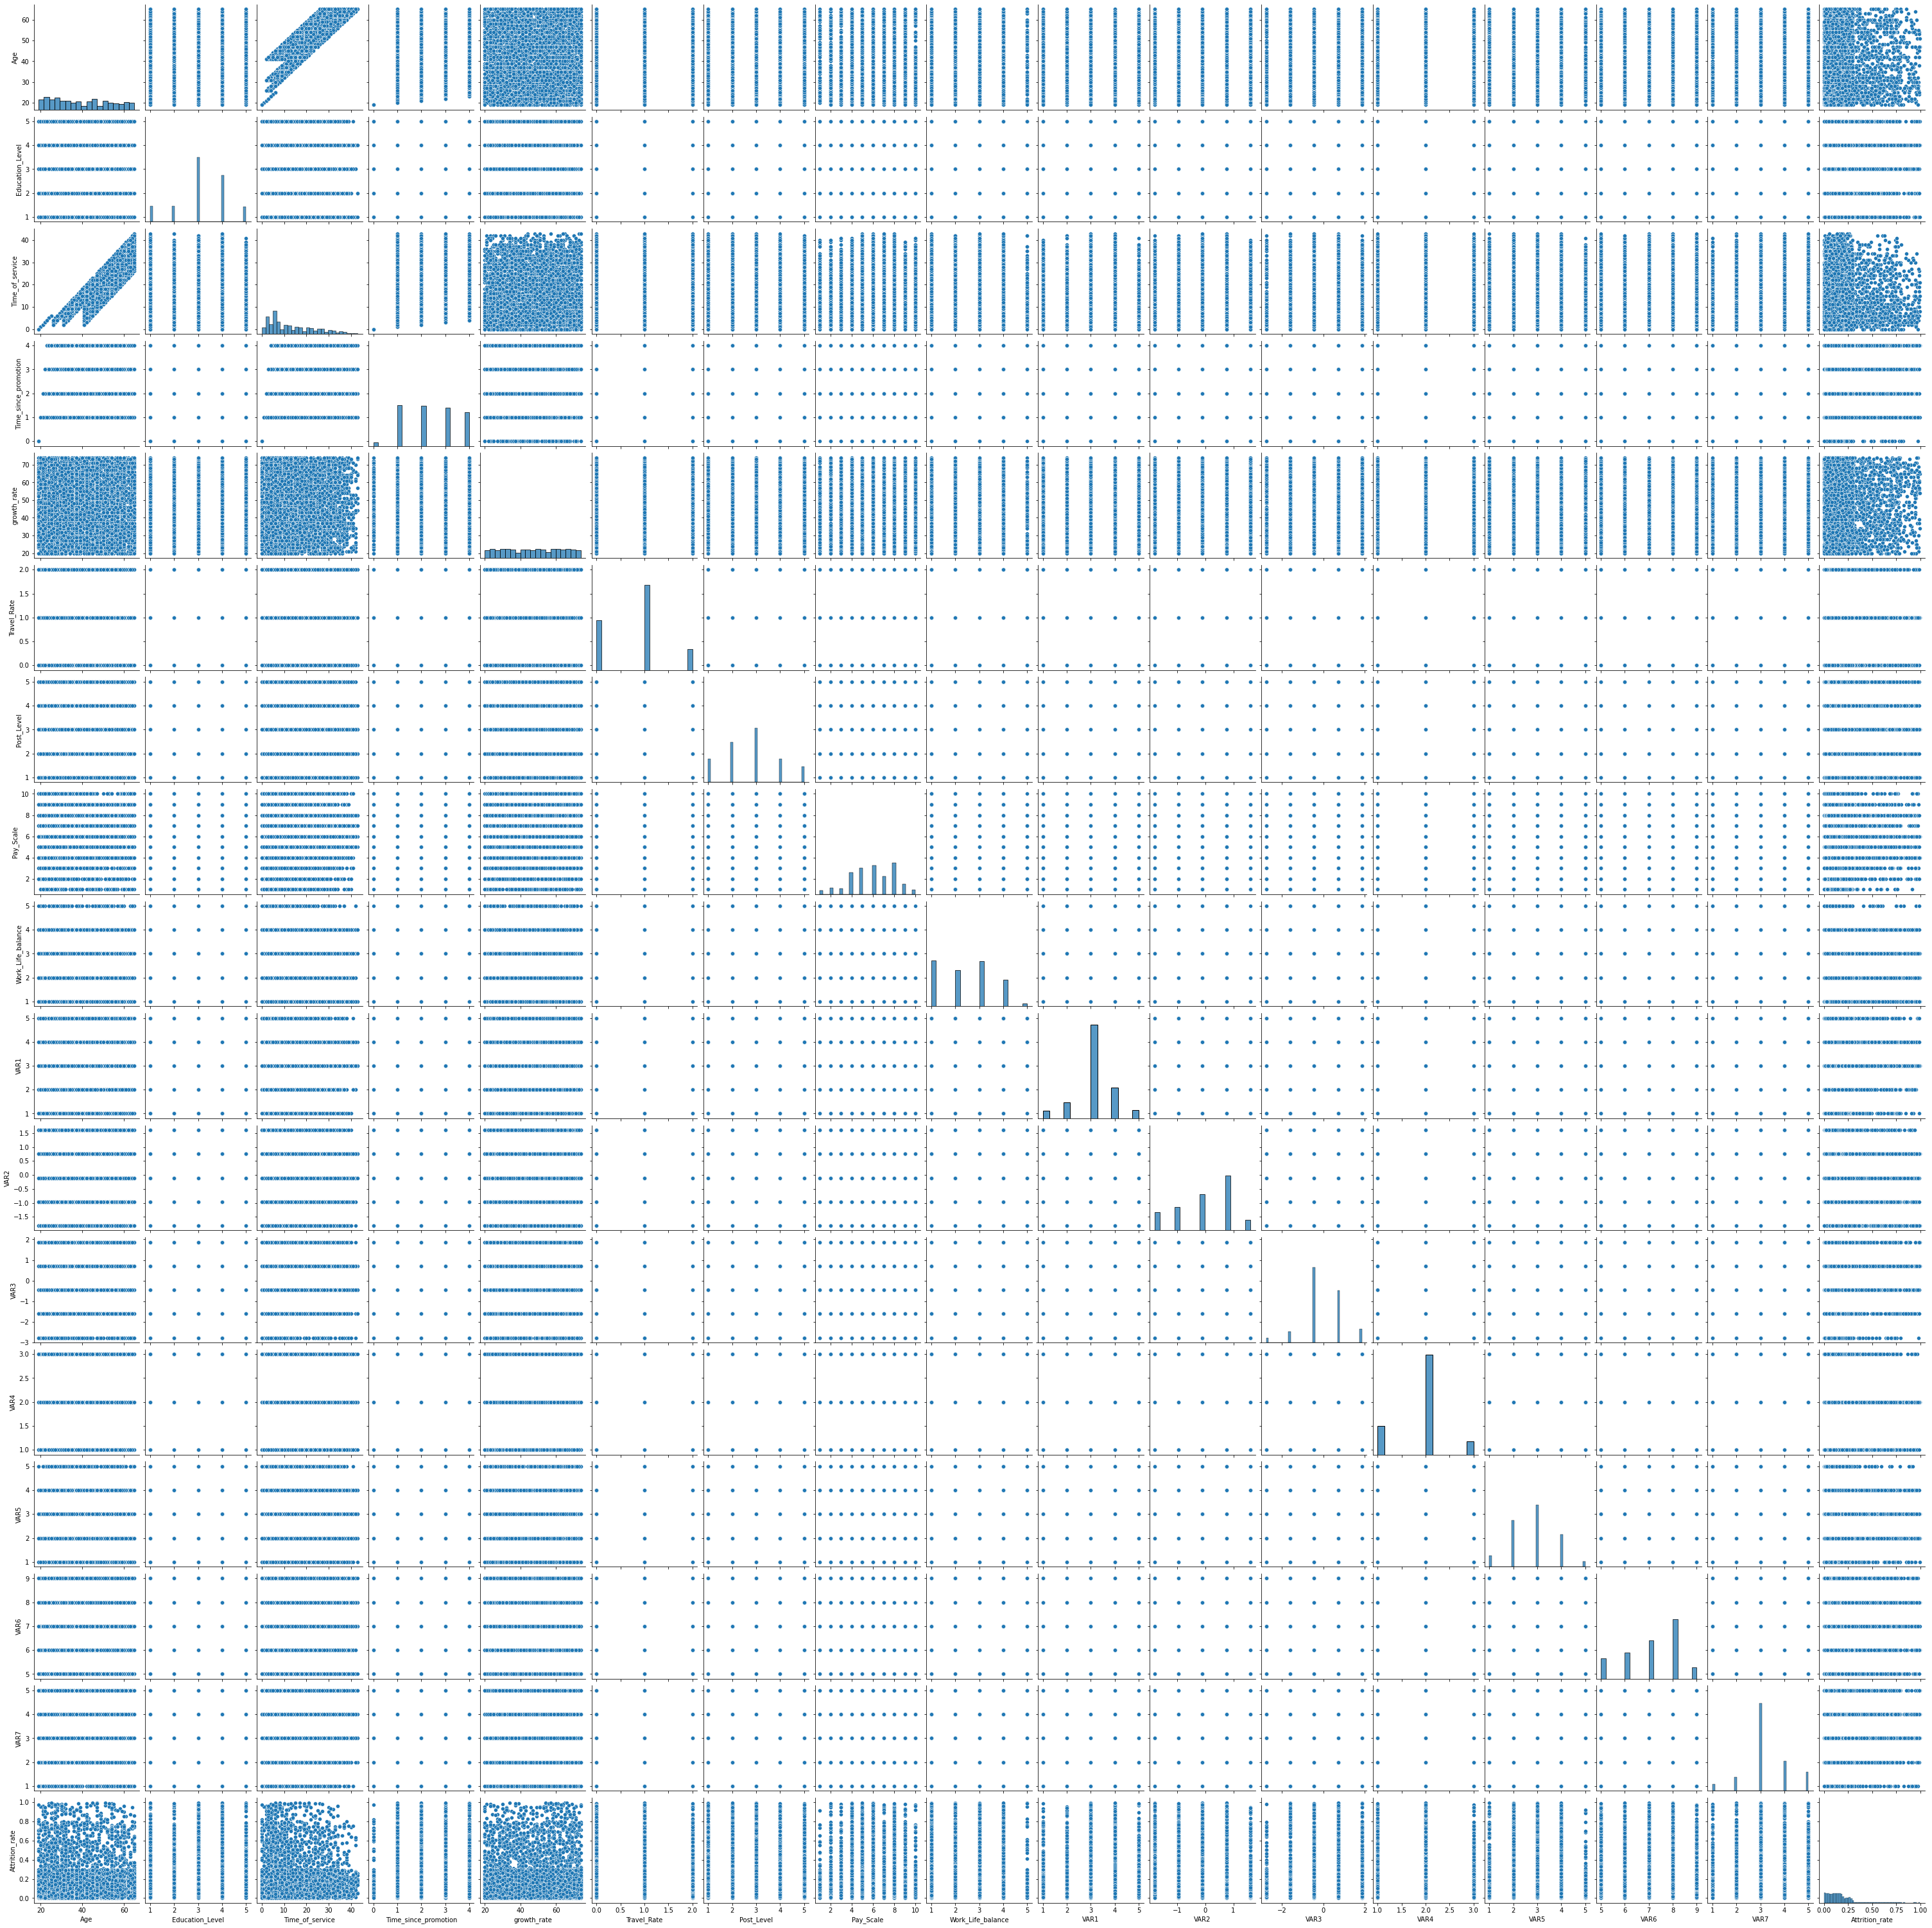

In [16]:
sns.pairplot(train)

In [17]:
full_data[full_data['Pay_Scale'].isna()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,data
445,EID_4641,M,52.0,3,Married,Clinton,Logistics,Behavioral,15.0,2,...,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803,train
1126,EID_16660,M,28.0,3,Married,Lebanon,Logistics,Directive,5.0,1,...,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154,train
1378,EID_19310,F,21.0,4,Single,Franklin,Sales,Directive,2.0,2,...,NaN,2,NaN,-0.4537,2.0,3,7,4,0.0617,train
1997,EID_24076,M,35.0,3,Married,Springfield,Logistics,Directive,12.0,1,...,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047,train
3083,EID_16076,M,23.0,5,Married,Lebanon,Operarions,Analytical,4.0,1,...,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841,train
3777,EID_13589,M,36.0,4,Married,Franklin,IT,Directive,9.0,1,...,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597,train
4508,EID_11400,M,33.0,3,Married,Washington,Operarions,Directive,5.0,1,...,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838,train
5958,EID_6740,F,52.0,3,Married,Clinton,Logistics,Conceptual,16.0,2,...,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900,train
6857,EID_24697,M,47.0,1,Single,Franklin,Sales,Directive,23.0,1,...,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509,train
8202,EID_17521,M,24.0,2,Married,Lebanon,Purchasing,Conceptual,5.0,2,...,3.0,3,-0.9612,-0.4537,2.0,4,6,3,NaN,test


In [18]:
from scipy.stats import mode
full_data.pivot_table(values="Compensation_and_Benefits", index = "Post_Level" , aggfunc=(lambda x: mode(x).mode[0]))

,Compensation_and_Benefits
Post_Level,
1,type2
2,type2
3,type2
4,type2
5,type2


In [19]:
from scipy.stats import mode
full_data.pivot_table(values="Work_Life_balance", index = "Post_Level" , aggfunc=(lambda x: mode(x).mode[0]))

,Work_Life_balance
Post_Level,
1,3.0
2,1.0
3,1.0
4,3.0
5,1.0


In [20]:
full_data.pivot_table(values="Compensation_and_Benefits", index = "Pay_Scale" , aggfunc=(lambda x: mode(x).mode[0]))

,Compensation_and_Benefits
Pay_Scale,
1.0,type2
2.0,type2
3.0,type2
4.0,type2
5.0,type2
6.0,type2
7.0,type2
8.0,type2
9.0,type2


In [21]:
full_data.pivot_table(values="Decision_skill_possess", index = "Compensation_and_Benefits" , aggfunc=(lambda x: mode(x).mode[0]))

,Decision_skill_possess
Compensation_and_Benefits,
type0,Analytical
type1,Analytical
type2,Behavioral
type3,Conceptual
type4,Analytical


C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points

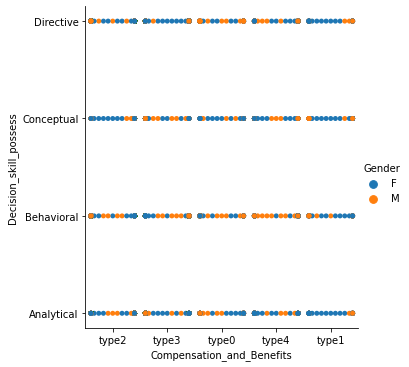

In [22]:


sns.catplot(x="Compensation_and_Benefits", y="Decision_skill_possess", hue="Gender", kind="swarm", data=full_data)

C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


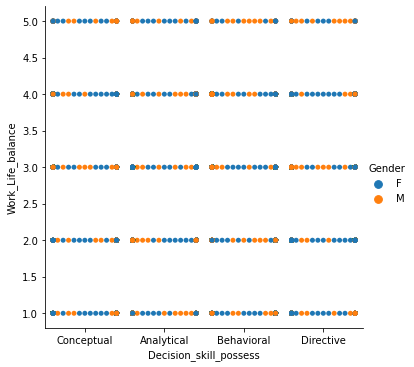

In [23]:
sns.catplot(x="Decision_skill_possess", y="Work_Life_balance", hue="Gender", kind="swarm", data=full_data)

C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.4% of the points

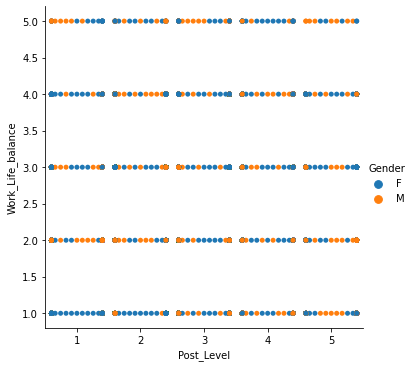

In [24]:
sns.catplot(x="Post_Level", y="Work_Life_balance", hue="Gender", kind="swarm", data=full_data)

C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


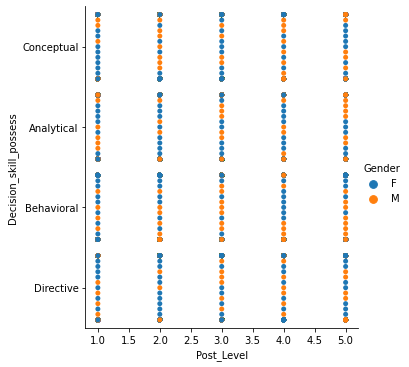

In [25]:
sns.catplot(x="Post_Level", y="Decision_skill_possess", hue="Gender", kind="swarm", data=full_data)

C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points 

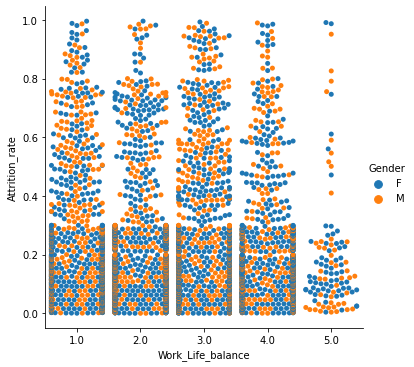

In [49]:
sns.catplot(x="Work_Life_balance", y="Attrition_rate", hue="Gender", kind="swarm", data=train)

C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nived\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


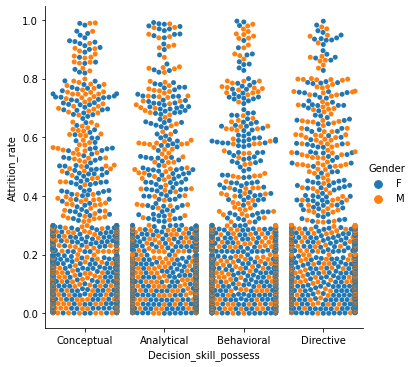

In [50]:
sns.catplot(x="Decision_skill_possess", y="Attrition_rate", hue="Gender", kind="swarm", data=train)

(array([2437., 2455., 1195.,  169.,  168.,  161.,  127.,  158.,   56.,
          74.]),
 array([0.     , 0.09959, 0.19918, 0.29877, 0.39836, 0.49795, 0.59754,
        0.69713, 0.79672, 0.89631, 0.9959 ]),
 <BarContainer object of 10 artists>)

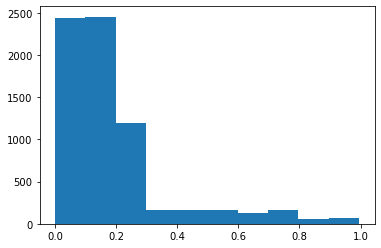

In [51]:
plt.hist(train['Attrition_rate'])

In [26]:


full_data["Pay_Scale"] = full_data.groupby("Compensation_and_Benefits").Pay_Scale.transform(lambda x: x.fillna(mode(x).mode[0]))

In [27]:
truth_table =full_data.pivot_table(values="Work_Life_balance", index = "Decision_skill_possess", columns = "Post_Level", aggfunc=(lambda x: mode(x).mode[0]))
truth_table

Post_Level,1,2,3,4,5
Decision_skill_possess,,,,,
Analytical,1.0,1.0,3.0,1.0,1.0
Behavioral,3.0,1.0,1.0,1.0,3.0
Conceptual,1.0,3.0,1.0,3.0,1.0
Directive,3.0,3.0,1.0,1.0,1.0


In [28]:

def find_worklifebalance(x):
    return truth_table.loc[x["Decision_skill_possess"], x["Post_Level"]]

In [29]:
#full_data[full_data["Work_Life_balance"].isnull()].apply(find_worklifebalance, axis= 1)
full_data["Work_Life_balance"].fillna(full_data[full_data["Work_Life_balance"].isnull()].apply(find_worklifebalance, axis= 1), inplace = True)

In [30]:
full_data["Age"] = full_data.groupby("Post_Level").Age.transform(lambda x : x.fillna(x.median()))
full_data["Time_of_service"] = full_data.groupby("Post_Level").Time_of_service.transform(lambda x : x.fillna(x.median()))

In [31]:

del full_data["VAR1"]
del full_data["VAR2"]
del full_data["VAR3"]
del full_data["VAR4"]
del full_data["VAR5"]
del full_data["VAR6"]
del full_data["VAR7"]

In [32]:
full_data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
Attrition_rate               3000
data                            0
dtype: int64

**Data** **Preprocessing**

In [33]:

category_data_columns = full_data.select_dtypes(exclude = np.number).drop(columns=["Employee_ID","data"]).columns

In [34]:
numeric_data_columns = full_data.select_dtypes(include = np.number).drop(columns = "Attrition_rate").columns

In [35]:
scaler = StandardScaler()
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(full_data[numeric_data_columns]), columns=numeric_data_columns)

In [36]:
preprocess_category_data_columns = pd.get_dummies(full_data[category_data_columns])

In [37]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, full_data[["Employee_ID","data", "Attrition_rate"]]], axis = 1)

In [38]:
final_preprocessed

,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,...,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Employee_ID,data,Attrition_rate
0,1,0,1,0,0,1,0,0,0,0,...,-0.912439,1.410253,-0.883936,0.277343,-1.534614,0.471043,0.545449,EID_23371,train,0.1841
1,0,1,0,1,0,0,0,1,0,0,...,-0.814592,1.410253,-0.694634,-1.269467,0.173359,-0.012078,1.431206,EID_18000,train,0.0670
2,1,0,1,0,1,0,0,0,0,0,...,1.338033,0.540478,0.251872,-1.269467,-0.680627,0.954165,-1.226065,EID_3891,train,0.0851
3,1,0,0,1,0,0,1,0,0,0,...,-0.912439,0.540478,0.567374,0.277343,0.173359,0.954165,-1.226065,EID_17492,train,0.0668
4,1,0,1,0,0,0,0,1,0,0,...,-0.814592,1.410253,0.945976,0.277343,0.173359,-1.944564,0.545449,EID_22534,train,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,0,0,0,0,...,-1.010286,0.540478,-0.568434,0.277343,0.173359,-0.012078,-0.340308,EID_22547,test,NaN
9996,1,0,0,1,0,1,0,0,0,0,...,-0.325359,-0.329297,0.630474,0.277343,1.027346,1.437286,-1.226065,EID_10066,test,NaN
9997,1,0,0,1,0,0,1,0,0,0,...,2.120805,-1.199072,1.387679,-1.269467,-0.680627,1.437286,0.545449,EID_7126,test,NaN
9998,1,0,1,0,0,0,0,1,0,0,...,0.946646,-1.199072,-1.073237,-1.269467,-0.680627,-0.012078,-1.226065,EID_4929,test,NaN


In [39]:
final_preprocessed.shape

(10000, 42)

In [40]:
train_df=final_preprocessed[final_preprocessed["data"]=="train"]
test_df=final_preprocessed[final_preprocessed["data"]=="test"]

In [41]:
train_X = train_df.drop(columns=[ "Employee_ID","data","Attrition_rate"])
train_y = np.log1p(train_df['Attrition_rate'])
test_X = test_df.drop(columns=["Attrition_rate","data","Employee_ID"])



In [42]:
sample_submission = pd.read_csv("Test.csv",usecols=["Employee_ID"])
def model_fit(model, train_X, train_y, test_X, filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    #print(type(test_pred))
    sample_submission['Attrition_rate'] = np.abs(test_pred)
    sample_submission.to_csv(filename, index = False)
    return  sample_submission

In [43]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X,  "linear_regression.csv" )

Train RMSE :  0.1382146711490019


In [44]:
model = Ridge(alpha=0.1)
linear_res = model_fit(model, train_X, train_y, test_X,  "Ridge.csv" )

Train RMSE :  0.1381731658879537


In [45]:

model = Lasso(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X,  "Lasso.csv" )

Train RMSE :  0.13860500041216706


In [46]:
model = ElasticNet(alpha=0.5)
linear_res = model_fit(model, train_X, train_y, test_X, "elastic_net.csv" )

Train RMSE :  0.13860500041216706


In [47]:
model = KNeighborsRegressor()
KNN = model_fit(model, train_X, train_y, test_X, "knn_default.csv" )

Train RMSE :  0.12421333270861783


In [48]:
res = []
for i in range(1,6):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model, train_X, train_y, test_X,  str(i)+"KNN.csv")
    res.append(err)

1
Train RMSE :  0.0
2
Train RMSE :  0.09769292700439224
3
Train RMSE :  0.11278926604029198
4
Train RMSE :  0.11999444048602304
5
Train RMSE :  0.12421333270861783
